# Introduction to Reinforcement Learning

> This chapter is inspired by the book [Hands-On Machine Learning](https://github.com/ageron/handson-ml2) written by Aurélien Géron.

## Learning objectives

- Understand what Reinforcement Learning (RL) is about.
- Review Markow Decision Processes.
- Discover some of the main approaches to RL.

## Environnement setup

In [1]:
import platform
from IPython.display import YouTubeVideo

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup plots

# Include matplotlib graphs into the notebook, next to the code
# https://stackoverflow.com/a/43028034/2380880
%matplotlib inline

# Improve plot quality
%config InlineBackend.figure_format = "retina"

# Setup seaborn default theme
# http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
sns.set_theme()

In [3]:
# Print environment info
print(f"Python version: {platform.python_version()}")
print(f"NumPy version: {np.__version__}")

Python version: 3.11.1
NumPy version: 1.26.3


## What is Reinforcement Learning?

### RL in a nutshell

Reinforcement Learning is about **learning how to evolve in a dynamic system**, often called the *environment*.

The learner and decision maker (often called an *agent*) is not told explicitly which **actions** to take, but instead must discover which actions yield the most **reward** over time by trying them.

Actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards.

![Learning to ride a bike!](_images/prosper_bike.gif)

### A specific subfield of ML

RL is different from **supervised learning**, where correct answers (desired behaviour) are given to the learner during training. A RL learner must be able to learn from its own experience.

RL is also different from **unsupervised learning**: finding structure in unlabeled data could help, but does not solve the reward maximisation problem which is at the heart of RL.

Lastly, RL is different from **evolutionary methods**, which only consider the final outcome and ignore the intermediate steps RL is concerned with.

### Reinforcement Learning examples

RL can be applied to a wide variety of contexts. To name a few:

- controlling a robot;
- manage a financial portfolio;
- steering a ship;
- playing a game.

### Recent breakthroughs

RL is not a new field but went mainstream in recent years, mostly due to game-related feats:

- [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far) beat Go champion Lee Sedol in 2016;
- [AlphaZero](https://deepmind.com/blog/article/alphazero-shedding-new-light-grand-games-chess-shogi-and-go) achieved superhuman level at chess, shogi and go in less than 24 hours in 2017;
- [OpenAI Five](https://openai.com/blog/openai-five/) demonstrated expert level play against other competitive Dota 2 teams in 2019;
- [AlphaStar](https://deepmind.com/blog/article/alphastar-mastering-real-time-strategy-game-starcraft-ii) reached StarCraft 2 Grandmaster level (top 0.2% of human players) also in 2019.

#### AlphaGo

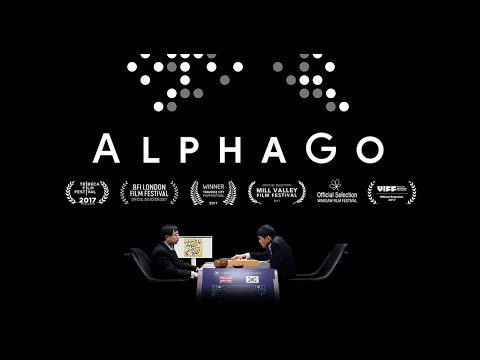

In [4]:
YouTubeVideo("WXuK6gekU1Y")

#### OpenAI's Hide and Seek

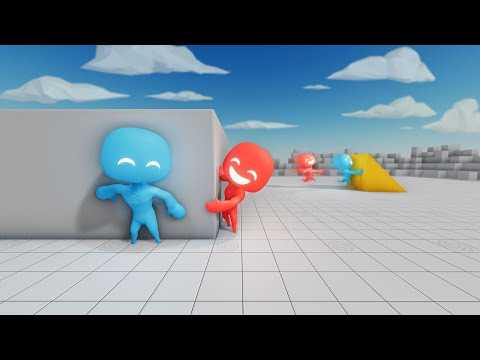

In [5]:
YouTubeVideo("kopoLzvh5jY")

## Terminology

### Elements of a RL system

- An **agent** that learns what to do.
- The **environment** that characterizes the dynamic system in which the agent evolves.
- The agent's **policy** that defines its way of behaving at a given time.
- **Reward signals** (or simply rewards) provided by the environment as results of the agent's actions.
- Optionally, a **model** of its environment built by the agent and used to predict future evolutions of the dynamic system.

![Representation of a RL system](_images/rl_agent_env.png)

### State

**State** represents the information available to the agent about its environment.

It is used as input to the agent's policy and value functions, and (optionally) as both input to and output from the agent's model.

> The issues of constructing, changing, or learning the state signal are out of the scope of this chapter, which concentrates on the decision-making aspects.

### Value functions

Whereas the reward indicates what is good in an immediate sense, a **value function** specifies what is good in the long run.

The value of a state is the total amount of reward an agent can expect to accumulate over the future, starting from that state.

Action choices should be made based on value judgments, seeking actions that bring about states of highest value, not highest reward.

Unfortunately, unlike rewards that are directly given by the environment, values are generally hard to obtain. They must be **estimated** and re-estimated from the sequences of observations an agent makes over its entire lifetime.

### The exploration vs. exploitation dilemna

The agent has to exploit what it has already experienced, but it also has to explore in order to discover better actions. Neither exploration nor exploitation can be pursued exclusively without failing at the task at hand.

![Exploration VS exploitation](_images/exploration_exploitation.png)

### Model-free Vs model-based RL

**Model-free** algorithms learn solely from experience, through trial-and-error.

On the contrary, algorithms that, during learning or acting, exploit predictions of the environment's response are said to be **model-based**. This class of algorithms is able to use *planning*, i.e. taking into account possible future situations before they are actually experienced ([more details](https://ai.stackexchange.com/a/6733)).

```{warning}
The term "model" has a different meaning in [supervised Machine Learning](principles.ipynb).
```

## Markov Decision Processes

### Definition

**Markov Decision Processes** {cite}`bellman1957` provide a mathematical framework for modeling decision making in discrete-time situations where, through its actions, outcomes are partly under the control of a decision maker.

They are an extension of **Markov chains** in which what happens next depends only on the current state.

MDPs are a classical formalization of sequential decision making.

Many RL problems with discrete actions can be modeled as MDPs.

### General formulation

![Agent-environment interface](_images/rl_mdp.png)

- $\mathcal{S}$: set of all valid states.
- $S_t \in \mathcal{S}$: observed **state** of the dynamic system at step $t$.
- $\mathcal{A}(S_t)$: set of all valid actions for state $S_t$ (or simply $\mathcal{A}$ when the action set is the same in all states).
- $A_t \in \mathcal{A}(S_t)$: **action** taken by the agent at step $t$ in order to (try to) control the system.
- $\mathcal{R} \subset \mathbb{R}$: set of all rewards.
- $R_t \in \mathcal{R}$: numerical **reward** received by the agent at step $t$. Both $S_t$ and $R_t$ result from the previous action $A_{t-1}$.

### Finite Markov Decision Processes

In a finite MDP, the states, actions, and rewards spaces ($\mathcal{S}$, $\mathcal{A}$, and $\mathcal{R}$) all have a finite number of elements.

$\forall t \in \mathbb{N}, R_t$ and $S_t$ are random variables with discrete probability distributions dependent only on $S_{t-1}$ and $A_{t-1}$. The dynamics of a finite MDP are entirely defined by these distributions.

$$p(s',r|s,a) \equiv P(S_t=s′, R_t=r | S_{t−1}=s, A_{t−1}=a)$$

$$\forall s \in \mathcal{S}, a \in \mathcal{A}(s), \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r|s,a) = 1$$

- $s, s' \in \mathcal{S}$: values of state before and after action $a$.
- $a \in \mathcal{A}(s)$: chosen action.
- $r \in \mathcal{R}$: value of reward received after action $a$.
- $p(s',r|s,a)$: probability of getting state $s'$ and reward $r$ after having selected action $a$ in state $s$.

### Markov property

This [property](https://en.wikipedia.org/wiki/Markov_property) refers to processes in which the probability of each possible value for $S_t$ and $R_t$ depends only on the immediately preceding state and action, $S_{t−1}$ and $A_{t−1}$, and not at all on earlier states and actions. Said differently: transitions only depend on the most recent state and action, not on prior history.

The state must include information about all aspects of the past agent–environment interactions.

A process with this property is said to be *markovian*.

### Additional formulations

$$p(s'|s,a) \equiv P(S_t=s′ | S_{t−1}=s, A_{t−1}=a) = \sum_{r \in \mathcal{R}} p(s',r|s,a)$$

$$r(s,a) \equiv \mathbb{E} \left[ R_t | S_{t−1}=s, A_{t−1}=a \right] = \sum_{r \in \mathcal{R}} r \sum_{s' \in \mathcal{S}} p(s',r|s,a)$$

$$r(s,a,s') \equiv \mathbb{E} \left[ R_t | S_{t−1}=s, A_{t−1}=a,  S_t=s' \right] = \sum_{r \in \mathcal{R}} r \frac {p(s',r|s,a)}{p(s'|s,a)}$$

- $p(s'|s,a)$: probability of getting state 𝑠′ after having selected action $a$ in state $s$.
- $r(s,a)$: expected reward after having selected $a$ in $s$.
- $r(s,a,s')$: expected reward after transitioning from $s$ to $s'$ through $a$.

### Example

The following MDP ([source](https://github.com/ageron/handson-ml2/blob/master/18_reinforcement_learning.ipynb)) has three states $s_0, s_1, s_2$ and up to three possible discrete actions $a_0,a_1,a_2$ for each state, some of them yielding positive of negative rewards.

![Example of a Markov decision process](_images/mdp_example.png)

Here, if action $a_0$ is chosen in state $s_0$, then with probability 0.7 we will go to state $s_0$ with reward +10, with probability 0.3 we will go to state $s_1$ with no reward, and we cannot go to state $s_2$.

#### Dynamics table

|$s$|$a$|$s'$|$p(s'|s,a)$|$r(s,a,s')$|
|-|-|-|-|-|
|$s_0$|$a_0$|$s_0$|$0.7$|$+10$|
|$s_0$|$a_0$|$s_1$|$0.3$||
|$s_0$|$a_1$|$s_0$|$1.0$||
|$s_0$|$a_2$|$s_0$|$0.8$||
|$s_0$|$a_2$|$s_1$|$0.2$||
|$s_1$|$a_0$|$s_1$|$1.0$||
|$s_1$|$a_2$|$s_2$|$1.0$|$-50$|
|$s_2$|$a_1$|$s_0$|$0.8$|$+40$|
|$s_2$|$a_1$|$s_1$|$0.1$||
|$s_2$|$a_1$|$s_2$|$0.1$||

#### Modelisation

The previous MDP can be computationally modelised as a set of arrays. States and actions are represented by their 0-based index.

In [6]:
# For each state, store the possible actions
possible_actions = [[0, 1, 2], [0, 2], [1]]

# For each state and possible action, store the transition probas p(s'|s,a)
transition_probabilities = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None],
]

# For each state and possible action, store the rewards r(s,a,s')
rewards = [
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
]

### Return

It is common to evaluate actions based on the sum of all the rewards that came after them, usually applying a *discount factor* to account for the present value of future rewards.

$$G_t = R_{t+1} + \gamma R_{t+2} +\gamma^2 R_{t+3} + · · · = \sum\limits_{k=0}^\infty \gamma^k R_{t+k+1} = R_{t+1} + \gamma G_{t+1}$$

- $G_t$: sum of discounted rewards received after step $t$, called **return**.
- $\gamma \in [0,1]$: discount factor. A lower value motivates the decision maker to favor taking actions early. Usually, $0.9<\gamma<0.99$.

### Policy

The algorithm used by the agent to determine its actions is called its **policy**. Policies may be *deterministic* or *stochastic* (involving some randomness).

Formally, a policy $\pi$ is a potentially probabilistic mapping from state space $\mathcal{S}$ to action space $\mathcal{A}(s), \forall s \in \mathcal{S}$.

$$\pi(a|s) \equiv P(A_t=a|S_t=s)$$

- $\pi(a|s)$: probability of selecting action $a$ in state $s$.

### State-value function

The relationship. between the value function of a state $v_\pi(s)$ and the value functions of its successor states is called the *Bellman equation*.

$$v_\pi(s) = \mathbb{E}_\pi \left[ G_t | S_t=s \right] = \mathbb{E}_\pi\left[ \sum\limits_{k = 0}^\infty \gamma^k R_{t+k+1} \bigg| S_t = s \right] \forall s \in \mathcal{S}$$

$$v_\pi(s) = \sum_{a \in \mathcal{A}(s)} \pi(a|s) \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r | s,a)\left[r + \gamma v_\pi(s')\right]$$

- $v_\pi(s)$: expected return that the agent will get by starting in state $s$ and following policy $\pi$.

### Action-value function

The function $q_\pi(s,a)$ expressing the value of taking a specific action is also called the *q-value* function.

$$q_\pi(s,a) = \mathbb{E}_\pi \left[ G_t | S_t=s, A_t=a \right] = \mathbb{E}_\pi\left[ \sum\limits_{k = 0}^\infty \gamma^k R_{t+k+1} \bigg| S_t = s, A_t=a \right]$$

$$q_\pi(s,a) = \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s',r | s,a) \left[r + \gamma v_\pi(s')\right]$$

- $q_\pi(s,a)$: expected return when starting in state $s$ and taking  action $a$, following policy $\pi$.

### Optimality

The optimal policy $\pi^*$ is the one that achieves the biggest return over the long run. The *Bellman optimality equations* defines the values of state and action under an optimal policy.

$$v_{\pi^*}(s) = v_*(s) = \underset{a \in \mathcal{A}(s)}{max}\;q_*(s,a) = \underset{a}{max} \sum_{s', r}p(s',r | s,a)\left[r + \gamma v_*(s')\right]$$

$$q_{\pi^*}(s,a) = q_*(s,a) = \sum_{s',r} p(s',r | s,a) \left[r + \gamma \underset{a'}{max} \;q_*(s',a')\right]$$

## Tabular methods

### Context

When the number of states and actions is limited, approximate value functions can be represented as arrays (*tables*) and stored in memory.

In this case, basic algorithms can often find exact solutions, i.e. the optimal value function and the optimal policy.

These **tabular methods** implement the core ideas of RL and form the building blocks of more powerful ones, used when the state and action spaces become too large.

### Value Iteration

Method for finding the optimal state value for each state.
- init all state value estimates to zero;
- iteratively update them using the following equation:

$$V_{k+1}(s) \leftarrow \underset{a}{max} \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V_k(s')\right] = \underset{a}{max}\; Q_k(s,a)$$

Given enough iterations, these estimates will converge to the optimal state values.

### Q-Value Iteration

Like the Value iteration algorithm, iteratively compute $Q_{k+1}(s,a)$ for all $(s,a)$ until convergence.

$$Q_{k+1}(s,a) \leftarrow \sum\limits_{s',r} p(s',r | s,a) \left[r + \gamma \cdot \underset{a'}{max} \;Q_k(s',a')\right]$$

In [7]:
def init_q_values():
    """Init action-state values to 0 for all possible actions in all states"""

    q_values = np.full((3, 3), -np.inf)  # -np.inf for impossible actions
    for state, actions in enumerate(possible_actions):
        q_values[state, actions] = 0.0  # for all possible actions
    return q_values


print(init_q_values())

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

In [8]:
def q_value_iteration(n_iterations):
    """Implement the Q-Value iteration algorithm"""

    q_values = init_q_values()

    gamma = 0.9  # Discount factor - try changing it to 0.95
    n_states = len(possible_actions)

    history = []  # Store training history for plotting (later)
    for _ in range(n_iterations):
        Q_prev = q_values.copy()
        history.append(Q_prev)
        # Compute Q_k+1 for all states and actions
        for s in range(n_states):
            for a in possible_actions[s]:
                q_values[s, a] = np.sum(
                    [
                        transition_probabilities[s][a][sp]
                        * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                        for sp in range(n_states)
                    ]
                )

    history = np.array(history)

    return q_values, history

In [9]:
n_iterations_q_value = 50
final_q_values, history_q_vi = q_value_iteration(n_iterations_q_value)

# Show final action-state values
print(final_q_values)

[[18.91891892 17.02702702 13.62162162]
 [ 0.                -inf -4.87971488]
 [       -inf 50.13365013        -inf]]


In [10]:
def print_optimal_actions(q_values):
    """Print actions with maximum Q-value for each state"""

    # Find action with maximum Q-value for each state
    optimal_actions = np.argmax(q_values, axis=1)

    n_states = len(possible_actions)
    for s in range(n_states):
        print(f"Optimal action for state {s} is a{optimal_actions[s]}")


print_optimal_actions(final_q_values)

Optimal action for state 0 is a0
Optimal action for state 1 is a0
Optimal action for state 2 is a1


### TD Learning

When the transition probabilities and rewards are not known in advance, the agent has to experience each state and each transition: once to know the rewards, several times to estimate the probabilities. It must use an **exploration policy** (for example, a purely random one) to traverse the MDP.

As it progresses, the **Temporal Difference (TD) Learning** algorithm updates the estimates of the state values based on the transition and rewards that are actually observed.

$$V_{k+1}(s) \leftarrow V_k(s) + \alpha\left(r + \gamma V_k(s') - V_k(s)\right) = V_k(s) + \alpha\cdot\delta_k(s, a, s')$$

$$V_{k+1}(s) \leftarrow (1-\alpha)V_k(s) + \alpha\left(r + \gamma V_k(s')\right)$$

$$V(s) \underset{\alpha}\leftarrow r + \gamma V(s')$$

- $\alpha$: learning rate, usually small (example: $0.001$).
- $\delta_k(s, a, s') = r + \gamma V_k(s') - V_k(s)$: TD error.

### Q-Learning

Adapted from the Q-Value Iteration algorithm for situations in which transitions and rewards are initially unknown, **Q-Learning** watches the agent play and gradually improves its estimations of the Q-values. Once it has accurate Q-Value estimates (or close enough), then the optimal policy is choosing the action that has the highest Q-Value (i.e. the *greedy* policy).

$$Q(s) \underset{\alpha}\leftarrow r + \gamma \cdot \underset{a}{max} \;Q(s',a')$$

In [11]:
def step(state, action):
    """Perform an action and receive next state and reward"""

    n_states = len(possible_actions)

    probas = transition_probabilities[state][action]
    next_state = np.random.choice(range(n_states), p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward


def exploration_policy(state):
    """Explore the MDP, returning a random action"""

    # This basic exploration policy is sufficient for this simple problem
    return np.random.choice(possible_actions[state])

In [12]:
def q_learning(n_iterations):
    """Implement the Q-learning algorithm"""

    q_values = init_q_values()

    alpha0 = 0.05  # initial learning rate
    decay = 0.005  # learning rate decay
    gamma = 0.9  # discount factor
    state = 0  # initial state
    history = []  # Training history

    for iteration in range(n_iterations):
        history.append(q_values.copy())
        action = exploration_policy(state)
        next_state, reward = step(state, action)
        next_q_value = np.max(q_values[next_state])  # greedy policy at the next step
        alpha = alpha0 / (1 + iteration * decay)  # learning rate decay
        q_values[state, action] *= 1 - alpha
        q_values[state, action] += alpha * (reward + gamma * next_q_value)
        state = next_state

    history = np.array(history)

    return q_values, history

In [13]:
# Show final action-state values
n_iterations_q_learning = 10000
final_q_values, history_q_learning = q_learning(n_iterations_q_learning)

print(final_q_values)

print_optimal_actions(final_q_values)

[[16.94809846 14.48478047 11.37047548]
 [ 0.                -inf -9.84761859]
 [       -inf 47.06994983        -inf]]
Optimal action for state 0 is a0
Optimal action for state 1 is a0
Optimal action for state 2 is a1


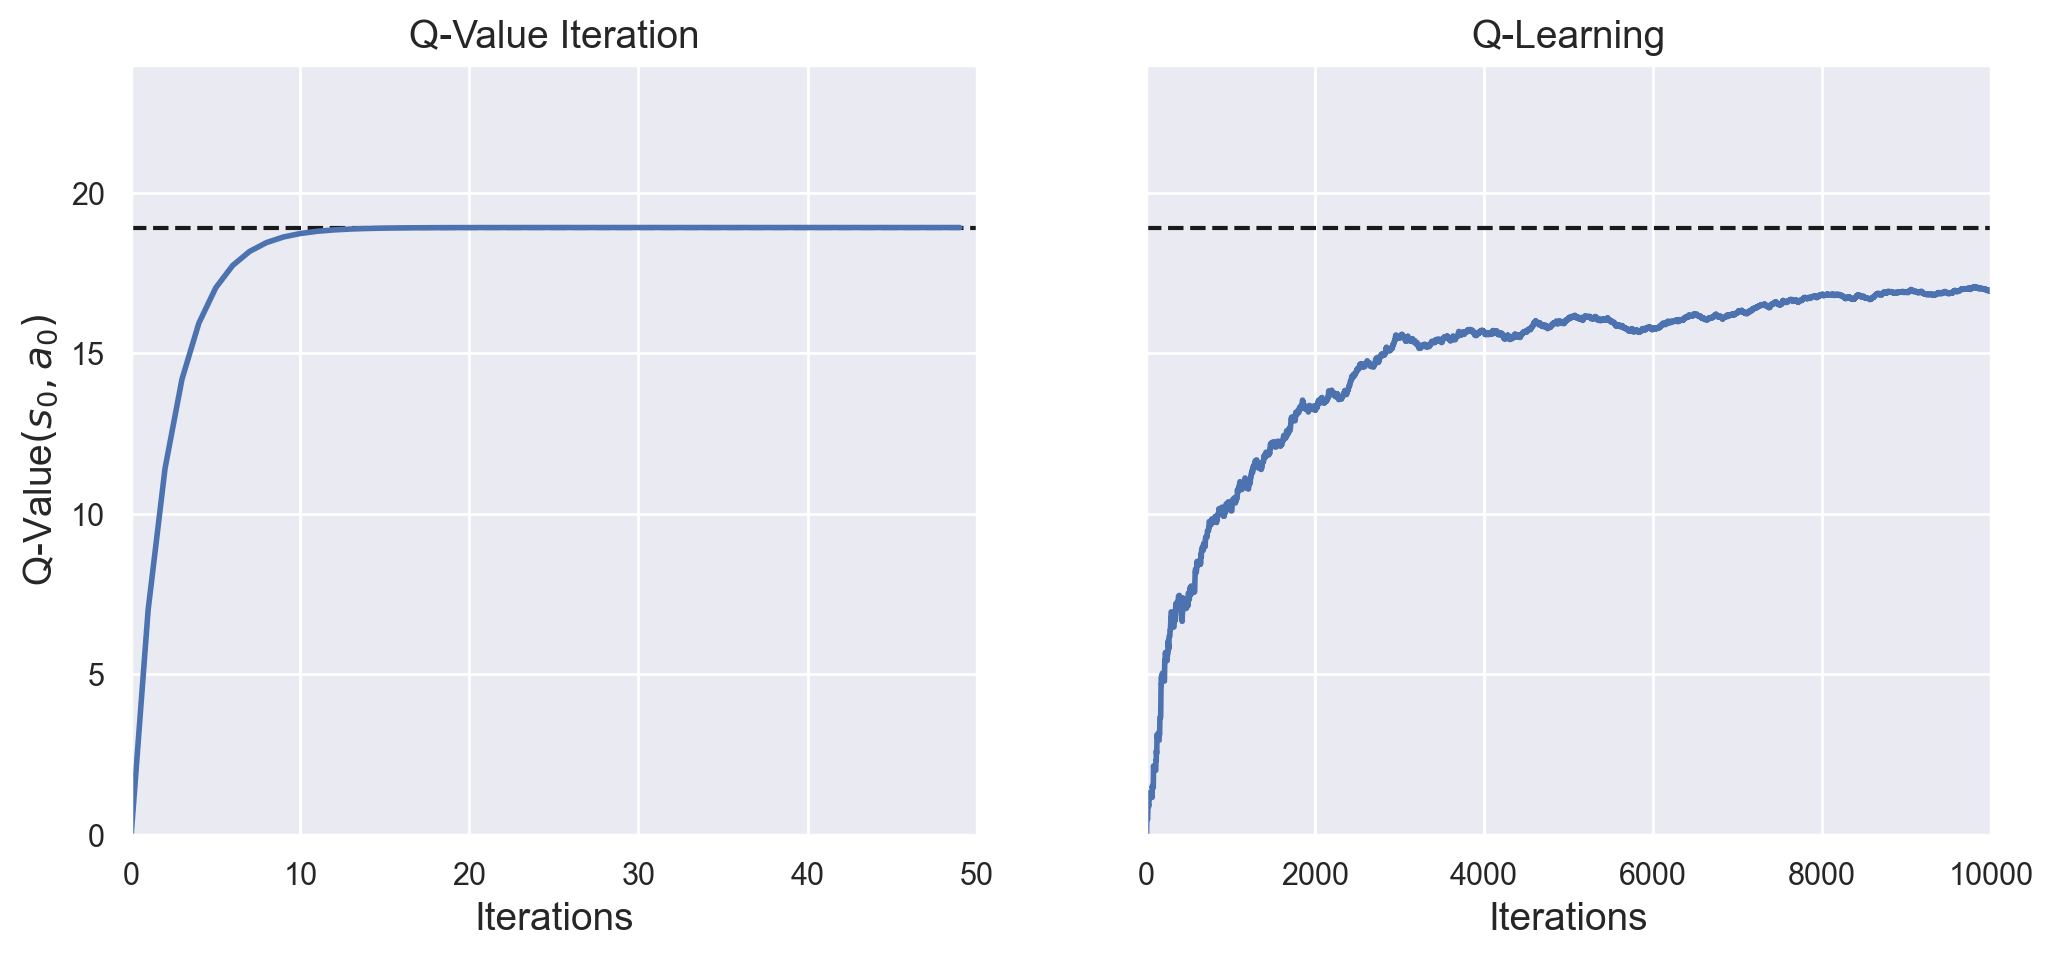

In [14]:
def plot_q_values():
    """Plot histories for Q-Value iteration and Q-learning algorithms"""

    final_q_value = history_q_learning[-1, 0, 0]  # final q-value for s0 and a0

    # Plot training histories for Q-Value Iteration and Q-Learning methods
    _, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
    axes[0].set_title("Q-Value Iteration", fontsize=14)
    axes[1].set_title("Q-Learning", fontsize=14)
    for ax, width, history in zip(
        axes,
        (n_iterations_q_value, n_iterations_q_learning),
        (history_q_vi, history_q_learning),
    ):
        ax.plot([0, width], [final_q_value, final_q_value], "k--")
        ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
        ax.set_xlabel("Iterations", fontsize=14)
        ax.axis([0, width, 0, 24])

    plt.show()

In [ ]:
plot_q_values()

## Approximate methods

### Context

The previous methods become intractable for problems with arbitrarily large state spaces. In such cases, it is hopeless to find an optimal policy or the optimal value function, even in the limit of infinite time and data. The goal instead is to discover a good approximate solution, using functions with a manageable number of parameters.

When dealing with large state spaces, **generalization** (the ability to make sensible decisions based on previous similar encounters) becomes a key issue. Generalization from examples is what **supervised learning** is all about, and many supervized methods have been applied to supplement RL algorithms.

For years, linear combinations of handcrafted features were necessary to estimate value functions through supervised models. Recently, reseachers have started to harness the power of **Deep Learning** for this task, eliminating the need for manual feature engineering.

### Policy gradients

Instead of trying to evaluate actions, **Policy Gradients (PG)** methods learn a parameterized policy that can select actions without consulting a value function. Policy parameters are optimized by following the *gradients* towards higher rewards.

One popular class of PG algorithms, called REINFORCE algorithms, was [introduced](https://homl.info/132) back in 1992.

### DQN

**Deep Q-Network (DQN)** was the first RL algorithm to feature a DL model. Introduced in 2014, it was used to learn to play old-school Atari games like Breakout.

DQN runs a deep neural network for approximating Q-Values. The network takes a state s (i.e. the last 4 screenshots of the game) as input, and outputs an estimation of the Q-Values of all actions in that state.

![](_images/dqn.png)

### Actor-Critic methods

This family of algorithms combines Policy Gradients with Deep Q-Networks. An Actor-Critic agent contains two neural networks: a policy net and a DQN.

- the DQN (critic) is trained normally, learning from the agent’s experiences;
- the policy net (actor) relies on the action values estimated by the DQN, a bit like an athlete learning with the help of a coach. After each action selection, the critic evaluates the new state to determine whether things have gone better or worse than expected.

### A3C

Introduced by DeepMind researchers in 2016, **Asynchronous Advantage Actor-Critic (A3C)** is an Actor-Critic variant where multiple agents learn in parallel, exploring different copies of the environment. At regular intervals, but asynchronously (hence the name), each agent pushes some weight updates to a master network, then it pulls the latest weights from that network. Each agent thus contributes to improving the master network and benefits from what the other agents have learned.

![](_images/A3C.png)


### PPO

**Proximal Policy Optimization (PPO)** is an algorithm based on Advantage Actor-Critic (A2C). In a nutshell, it makes RL less sensitive to step size without the tradeoffs incurred by other approaches.

In 2019, OpenAI Five, based on the PPO algorithm, defeated the world champions at the multiplayer game Dota 2.